In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 확인 / 처리

## 서울시 학원 교습소 정보

In [2]:
df = pd.read_csv("./data/서울시 학원 교습소정보.csv", encoding='euc-kr')
def f1(x):
    if x!=x:
        return np.nan
    else:
        return int(str(x)[:4])
    
df['개설년도'] = df['등록일자'].apply(f1)

# 2023년도 이전에 개설된 학원만
df = df.loc[df['개설년도']<=2023]
print(df.shape)
df.head(2)

(24527, 23)


,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시,개설년도
0,동대문구,학원,1000000064,대성회계실무학원,서울특별시 동대문구 왕산로 225,", 5층2호?5층6호?5층7호 중 일부(B호) (청량리동, 미주상가)",종합(대),NaN,"전산회계,컴퓨터(정보처리,통신기기,인터넷,소프트웨어)",NaN,...,Y,N,2490,개원,19681227,NaN,99991231.0,19681227,20231018,1968
1,동대문구,학원,1000000083,국제전자과학학원,서울특별시 동대문구 고산자로36길 3,", 3층 일부 (제기동, 경동시장)",직업기술,산업기반기술,"전자,",전자,...,Y,N,2571,개원,19680210,NaN,99991231.0,19680210,20231018,1968


## 서울시 상권 데이터

In [3]:
dfdf = pd.read_csv('./data/서울시 상권 데이터(교육).csv', index_col=False)
print(dfdf.shape)
dfdf.head(2)

(26186, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220805430870,볼벤,NaN,P1,교육,P106,기타 교육,P10625,기타 기술/직업 훈련학원,P85669,...,1144012500102140020017478,청운빌라,서울특별시 마포구 월드컵로30다길 41,121846,3965,NaN,4,NaN,126.908665,37.562237
1,MA0101202210A0096343,나라차중계태권도장,NaN,P1,교육,P106,기타 교육,P10601,태권도/무술학원,P85611,...,1135010600103640019010971,삼부프라자,서울특별시 노원구 한글비석로 242,139861,1734,NaN,NaN,NaN,127.076956,37.649226


# 분석

## '지역구'별 학원 현황

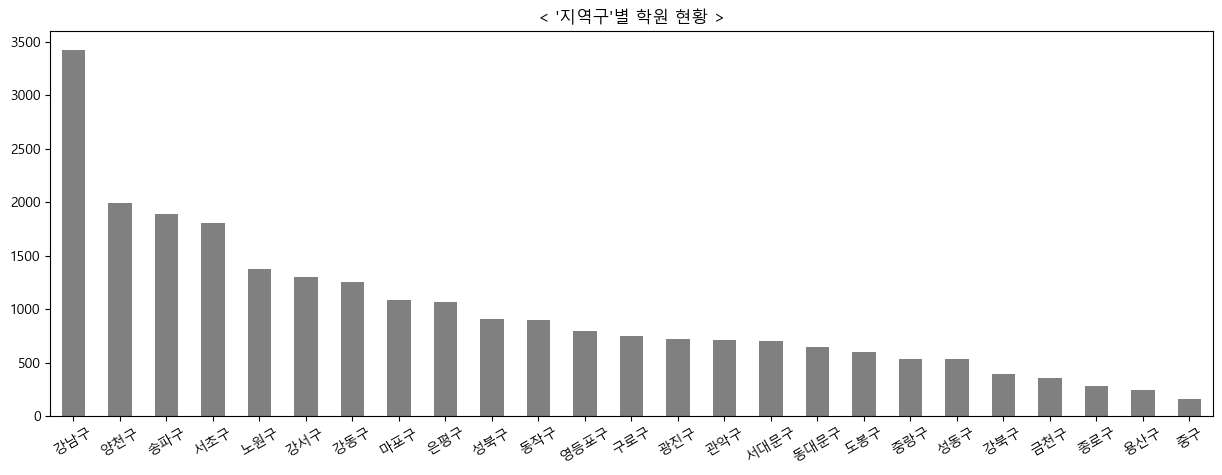

In [4]:
fig, ax = plt.subplots(figsize=(15,5))
_=df['행정구역명'].value_counts().plot.bar(color='grey')
_=plt.xticks(rotation=30)
_=plt.xlabel("")
_=plt.title("< '지역구'별 학원 현황 >")

## 교습분야 현황

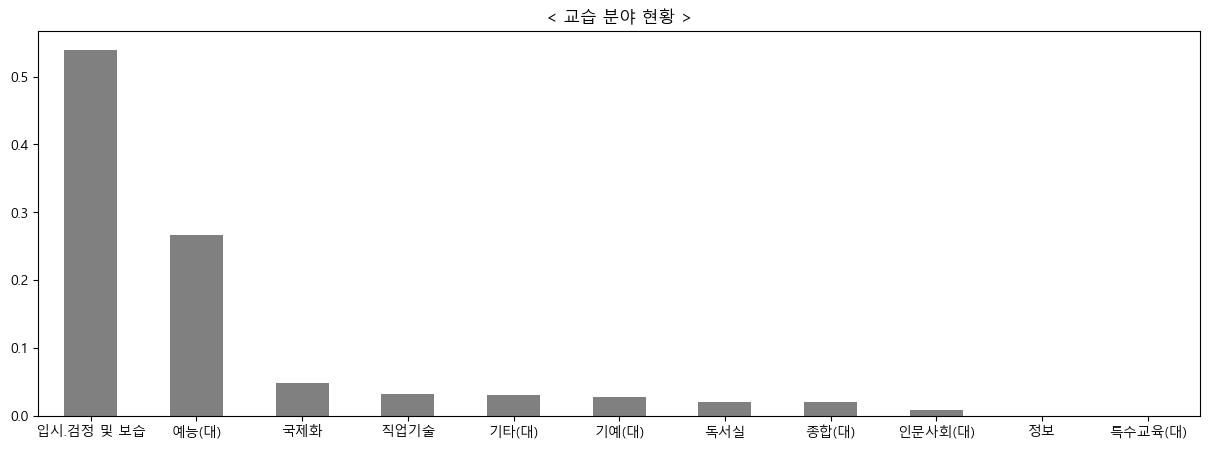

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
_=df['분야명'].value_counts(normalize=True).plot.bar(ax = ax, color='grey')
_=plt.xticks(rotation=360)
_=plt.xlabel("")
_=plt.title("< 교습 분야 현황 >")

## 교습계열 현황

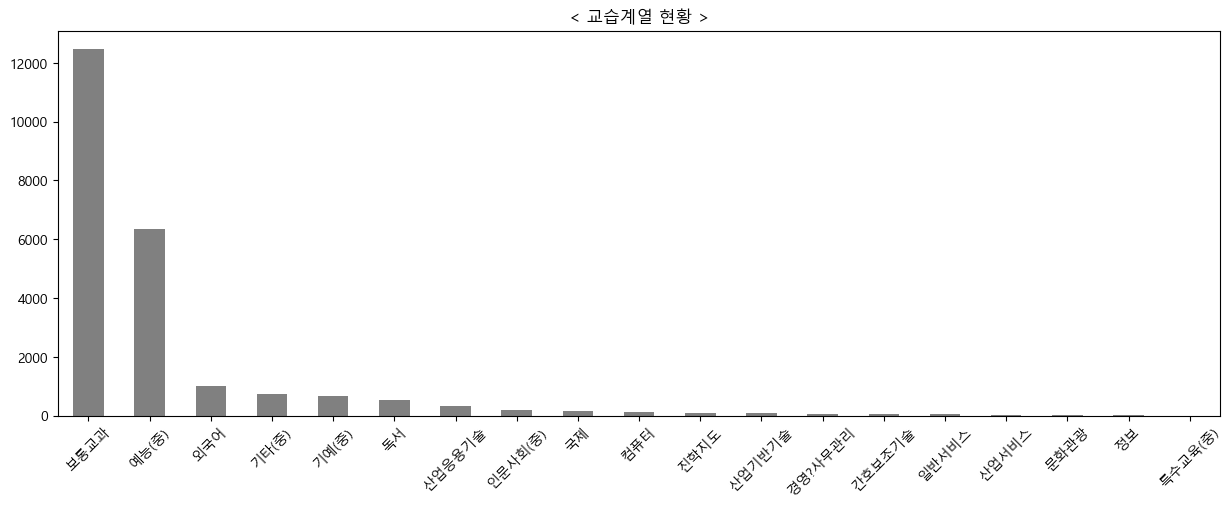

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
_=df['교습계열명'].value_counts().plot.bar(color='grey', ax=ax)
_=plt.xticks(rotation=45)
_=plt.xlabel("")
_=plt.title("< 교습계열 현황 >")

## 연도별 개원 현황

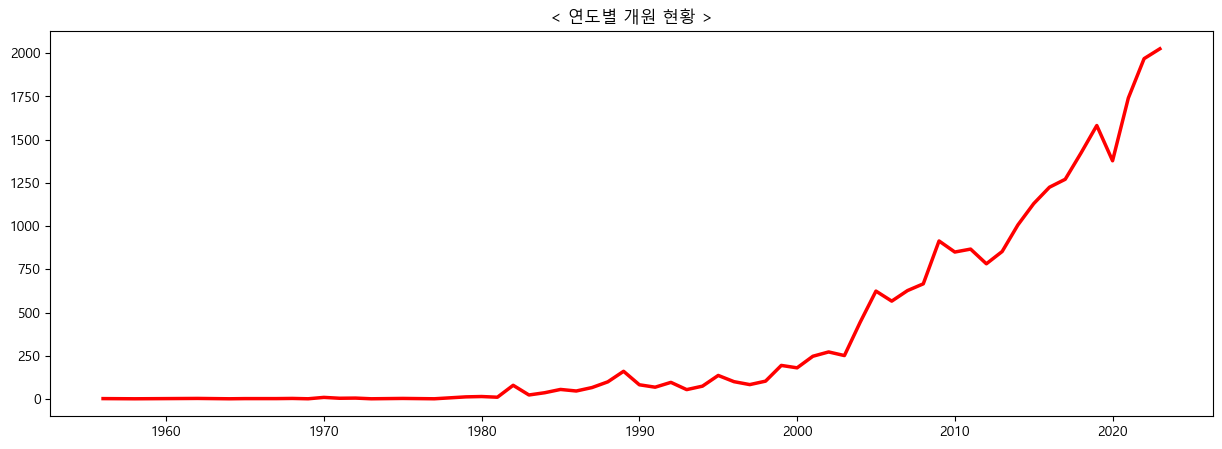

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))

df_1 = df['개설년도'].value_counts().sort_index().to_frame().reset_index()
_=sns.lineplot(data = df_1,
               x = '개설년도', y='count',
               ax=ax, linewidth=2.5, color='red')
_=plt.xlabel('')
_=plt.ylabel('')
_=plt.title("< 연도별 개원 현황 >")

In [8]:
# df_20s = df.loc[(df['개설년도']>=2020)&(df['개설년도']<=2023)]
# print(df_20s.shape)
# df_20s.head()

In [9]:
# fig, ax = plt.subplots(figsize=(15,5))
# _=df_20s['교습계열명'].value_counts().plot.bar(color='grey')
# _= plt.xticks(rotation=45)
# _= plt.xlabel("")

In [10]:
# com_df = df.loc[df['교습계열명']=="컴퓨터"]

# print(com_df.shape)
# com_df.head(2)

In [11]:
# fig, ax = plt.subplots(figsize=(15,5))
# _=com_df['개설년도'].value_counts().sort_index().plot.line(color='red', linewidth=2.5)

# _=plt.title("< 연도별 개설된 컴퓨터학원 >")
# _=plt.xlabel("")

In [12]:
# fig, ax = plt.subplots(figsize=(15,5))
# _=com_df['행정구역명'].value_counts().plot.bar(color='grey')
# _=plt.xticks(rotation=30)
# _=plt.xlabel("")
# _=plt.title("< '구'별 컴퓨터학원 수 >")

## 천재교육 산하 '해법학원'

In [13]:
hb_df = df.loc[df['학원명'].str.contains('해법')]
hb_df.reset_index(inplace=True, drop=True)

print(hb_df.shape)
hb_df.head(2)

(386, 23)


,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시,개설년도
0,서대문구,학원,1000008872,스마트해법수학해법영어홍제원학원,서울특별시 서대문구 통일로34길 28-6,", 2층 (홍제동)",입시.검정 및 보습,보통교과,보습,보습,...,Y,N,120854,개원,20001130,NaN,99991231.0,20001130,20240707,2000
1,구로구,학원,1000012603,해법학원,서울특별시 구로구 구로동로42길 56,", 2층 (구로동)",입시.검정 및 보습,보통교과,NaN,보습,...,Y,N,8280,개원,19951012,NaN,99991231.0,19951012,20241006,1995


In [14]:
hb_dfdf = dfdf.loc[dfdf['상호명'].str.contains('해법')]
hb_dfdf.reset_index(drop=True, inplace=True)
print(hb_dfdf.shape)
hb_dfdf.head(2)

(111, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220805507515,해법영어교실용마영어교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,1121510100101380035023389,NaN,서울특별시 광진구 용마산로3길 98,143891,4926,NaN,1,NaN,127.082969,37.557349
1,MA010120220805517697,스마트해법수학신상도점수학교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,1159010200102030036033877,NaN,서울특별시 동작구 장승배기로 13,156841,7047,NaN,2,NaN,126.942814,37.499718


### '지역구'별 해법학원 현황

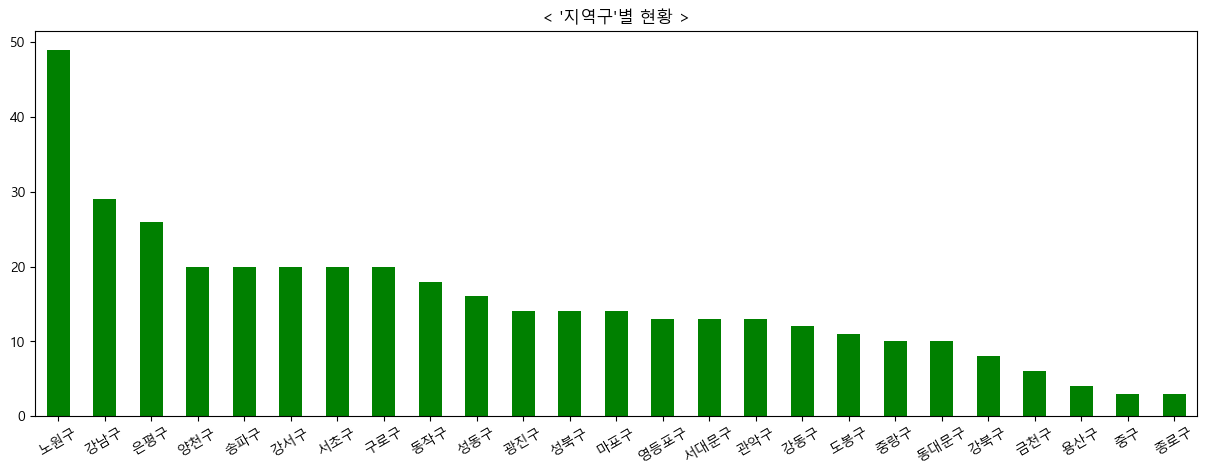

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
_= hb_df['행정구역명'].value_counts().plot.bar(color = 'green')
_= plt.xticks(rotation=30)
_= plt.xlabel("")
_= plt.title("< '지역구'별 현황 >")

### 연도별 '해법학원' 개원 현황

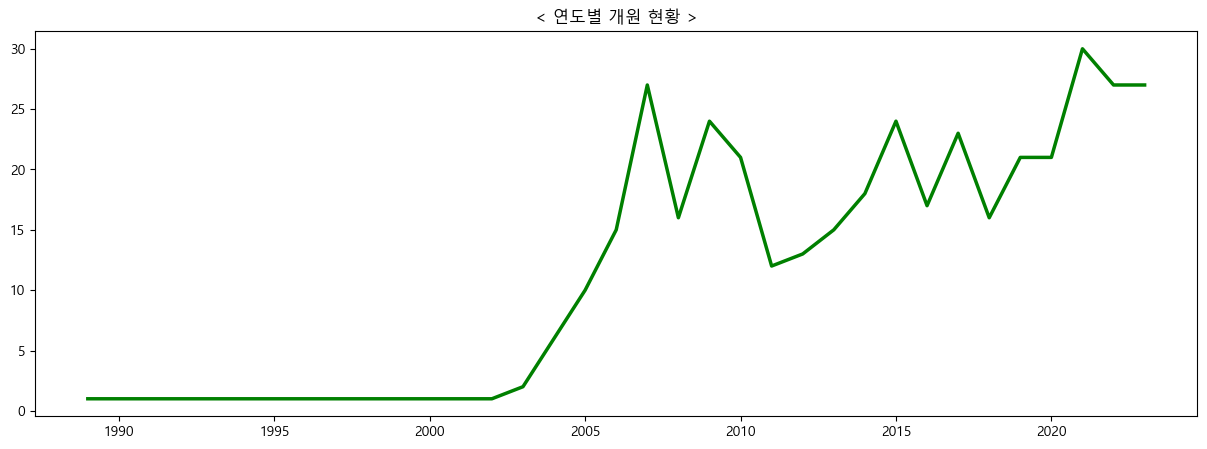

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
_=hb_df['개설년도'].value_counts().sort_index().plot.line(color='green', linewidth=2.5)
_=plt.title("< 연도별 개원 현황 >")
_=plt.xlabel("")